In [ ]:
%tensorflow_version

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:

import numpy as np
import pandas as pd
from numpy import array
from collections import defaultdict
import re

from bs4 import BeautifulSoup

import sys
import os
import string
os.environ['KERAS_BACKEND']='tensorflow'

from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical

from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional, TimeDistributed
from keras.models import Model, Sequential

from keras import backend as K
# from keras.engine.topology import Layer, InputSpec
from tensorflow.keras.layers import Layer, InputSpec
from keras import initializers

import tensorflow as tf
# from keras.backend.tensorflow_backend import set_session
from keras.backend import set_session
from pickle import dump



In [ ]:
def gpu_alloc(device_id):
    os.environ["CUDA_VISIBLE_DEVICES"]=device_id
    config = tf.compat.v1.ConfigProto()
    config.gpu_options.allow_growth = True
    set_session(tf.compat.v1.Session(config=config))

In [ ]:
gpu_alloc("1")

In [ ]:
!wget https://raw.githubusercontent.com/mayank2498/The-Republic-language-model/master/republic_cleaned.txt

--2022-11-27 18:01:58--  https://raw.githubusercontent.com/mayank2498/The-Republic-language-model/master/republic_cleaned.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657816 (642K) [text/plain]
Saving to: ‘republic_cleaned.txt’

republic_cleaned.tx 100%[===================>] 642.40K  --.-KB/s    in 0.02s   

2022-11-27 18:01:58 (40.0 MB/s) - ‘republic_cleaned.txt’ saved [657816/657816]



In [ ]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# load document
in_filename = 'republic_cleaned.txt'
doc = load_doc(in_filename)
print(doc[:200])

# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

﻿I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in what manner 
['went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus', 'chanced

In [ ]:
!cat /content/republic_sequences.txt

Streaming output truncated to the last 5000 lines.
ruling power in each state certainly and the different forms of government make laws democratical aristocratical tyrannical with a view to their several interests and these laws which are made by them for their own interests are the justice which they deliver to their subjects and him who transgresses them they
power in each state certainly and the different forms of government make laws democratical aristocratical tyrannical with a view to their several interests and these laws which are made by them for their own interests are the justice which they deliver to their subjects and him who transgresses them they punish
in each state certainly and the different forms of government make laws democratical aristocratical tyrannical with a view to their several interests and these laws which are made by them for their own interests are the justice which they deliver to their subjects and him who transgresses them they punish as
each state ce

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
and take possession of the ship and make free with the stores thus eating and drinking they proceed on their voyage in such manner as might be expected of them him who is their partisan and cleverly aids them in their plot for getting the ship out of the captains hands
take possession of the ship and make free with the stores thus eating and drinking they proceed on their voyage in such manner as might be expected of them him who is their partisan and cleverly aids them in their plot for getting the ship out of the captains hands into
possession of the ship and make free with the stores thus eating and drinking they proceed on their voyage in such manner as might be expected of them him who is their partisan and cleverly aids them in their plot for getting the ship out of the captains hands into their
of the ship and make free with the stores thus eating and drinking they proceed on their voyage in such manner as might be expected of t

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# load
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            370500    
                                                                 
 lstm (LSTM)                 (None, 50, 100)           60400     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 7410)              748410    
                                                                 
Total params: 1,269,810
Trainable params: 1,269,810
Non-trainable params: 0
_________________________________________________________________
None


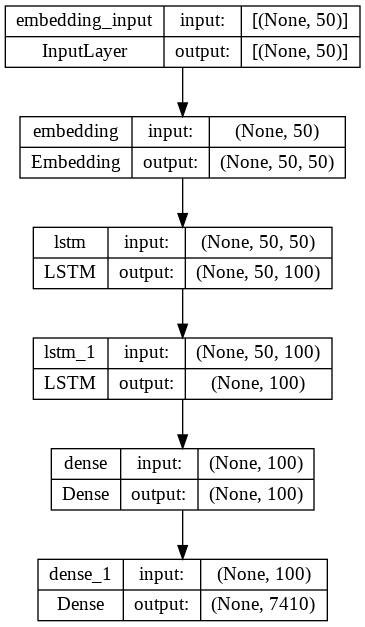

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
927/927 [==============================] - 217s 230ms/step - loss: 6.1346 - accuracy: 0.0745
Epoch 2/100
927/927 [==============================] - 210s 227ms/step - loss: 5.6678 - accuracy: 0.1091
Epoch 3/100
927/927 [==============================] - 217s 234ms/step - loss: 5.4178 - accuracy: 0.1319
Epoch 4/100
927/927 [==============================] - 208s 225ms/step - loss: 5.2692 - accuracy: 0.1443
Epoch 5/100
927/927 [==============================] - 206s 223ms/step - loss: 5.1630 - accuracy: 0.1514
Epoch 6/100
927/927 [==============================] - 205s 221ms/step - loss: 5.0698 - accuracy: 0.1574
Epoch 7/100
927/927 [==============================] - 207s 223ms/step - loss: 4.9799 - accuracy: 0.1639
Epoch 8/100
927/927 [==============================] - 204s 220ms/step - loss: 4.8969 - accuracy: 0.1694
Epoch 9/100
927/927 [==============================] - 205s 221ms/step - loss: 4.8163 - accuracy: 0.1742
Epoch 10/100
927/927 [==============================] -

In [ ]:
# save the model to file
model.save('model.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [ ]:
# Use LM
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences


# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)